# Proof Of Concept

In [1]:
from Utility import ast_visualizer
from Utility import ast_utility
import ast
import os
import matplotlib.pyplot as plt

In [2]:
task_names=["A","B","C"]
task_list=dict()
for task in task_names:
    task_list[task]=os.listdir(f"Task03646/{task}")

In [10]:
def get_embedding(tree):
    embedding = ast_utility.ASTEmbedding(3)
    embedding.visit(tree)
    return embedding.embeddings

def get_all_embeddings(tree_visitor):
    functions_embedding=[]
    functions_embedding.append(get_embedding(tree_visitor.global_code))

    for function in tree_visitor.function_list:
        functions_embedding.append(get_embedding(function))
    
    return functions_embedding

def get_all_trees(tree_visitor):
    trees=[]
    trees_dim=[]
    trees.append(tree_visitor.global_code)
    trees_dim.append(tree_visitor.global_code_node_count)
    for i in range(len(tree_visitor.function_list)):
        trees.append(tree_visitor.function_list[i])
        trees_dim.append(tree_visitor.function_node_count[i])
        
    return trees,trees_dim

In [15]:
task_embeddings=dict()
task_trees=dict()
task_trees_dim=dict()

for task in task_names:
    task_embeddings[task]=[]
    task_trees[task]=[]
    task_trees_dim[task]=[]

    for file in task_list[task]:
        tree=None
        with open(f"Task03646/{task}/"+file,"r") as f:
            code = f.read()
            try:
                tree = ast.parse(code)
            except:
                continue
        tree_visitor=ast_utility.ASTParser()
        tree_visitor.visit(tree)

        trees,trees_dim=get_all_trees(tree_visitor)
        task_trees[task].append(trees)
        task_trees_dim[task].append(trees_dim)
        task_embeddings[task].append(get_all_embeddings(tree_visitor))


In [16]:
def get_maximum_tree_similarity(task1_class,task2_class,task1,task2):
    max_similarity=0
    max_sim_tree1=None
    max_sim_tree2=None

    index=0
    for tree1 in task_trees[task1_class][task1]:
        for tree2 in task_trees[task2_class][task2]:
            #Note: It's important to weight the similarity by the number of nodes in the tree because the diff returns the number of changes to apply to the first tree to make it equal to the second tree
            similarity=1-ast_utility.diff(tree1,tree2)/task_trees_dim[task1_class][task1][index]
            if(similarity>max_similarity):
                max_similarity=similarity
                max_sim_tree1=tree1
                max_sim_tree2=tree2
                
        index+=1

    return max_similarity,max_sim_tree1,max_sim_tree2

def get_maximum_jaccard_similarity(task1_class,task2_class,task1,task2):
    max_similarity=0
    max_sim_embedding1=None
    max_sim_embedding2=None

    for embedding1 in task_embeddings[task1_class][task1]:
        for embedding2 in task_embeddings[task2_class][task2]:
            similarity=ast_utility.jaccard(embedding1,embedding2)
            if(similarity>max_similarity):
                max_similarity=similarity
                max_sim_embedding1=embedding1
                max_sim_embedding1=embedding2

    return max_similarity,max_sim_embedding1,max_sim_embedding2

In [21]:
similarity=[]
jaccard=[]
for i,task1 in enumerate(task_list["A"]):
    for j,task2 in enumerate(task_list["A"]):

        max_similarity,max_sim_tree1,max_sim_tree2=get_maximum_tree_similarity("A","A",i,j)
        similarity.append(max_similarity)
        
        max_jaccard,max_sim_embedding1,max_sim_embedding2=get_maximum_jaccard_similarity("A","A",i,j)
        jaccard.append(max_jaccard)

In [22]:
similarity2=[]
jaccard2=[]
for i,task1 in enumerate(task_list["A"]):
    for j,task2 in enumerate(task_list["B"]):

        max_similarity,max_sim_tree1,max_sim_tree2=get_maximum_tree_similarity("A","B",i,j)
        # print(f"Task1: {task1} Task2: {task2} Similarity: {max_similarity}")
        similarity2.append(max_similarity)
        
        max_jaccard,max_sim_embedding1,max_sim_embedding2=get_maximum_jaccard_similarity("A","B",i,j)
        jaccard2.append(max_jaccard)


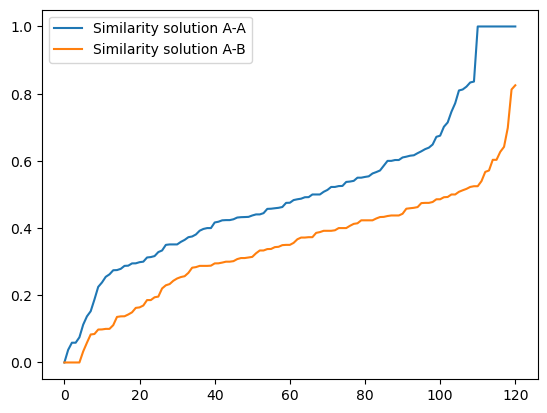

In [23]:
similarity.sort()
similarity2.sort()
plt.plot(similarity,label="Similarity solution A-A")
plt.plot(similarity2,label="Similarity solution A-B")
plt.legend()
plt.show()

Si evidenzia come l'indice di similarità tra soluzioni appartenenti allo stesso gruoppo hanno mediamente valore di similarità maggiore rispetto a quelle che risolvono lo stesso task, ma appartenendo ad un gruppo diverso. 
Questo fa ben sperare per la funzionalità della misura.

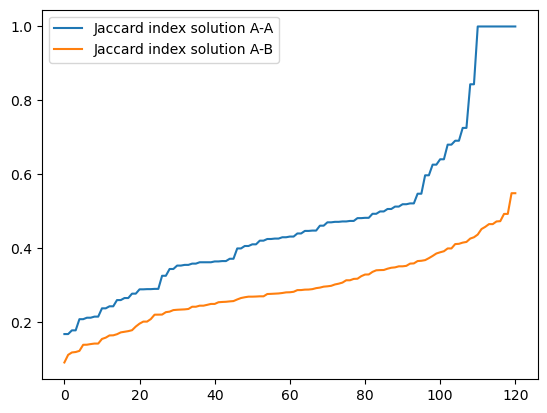

In [24]:
jaccard.sort()
jaccard2.sort()
plt.plot(jaccard,label="Jaccard index solution A-A")
plt.plot(jaccard2,label="Jaccard index solution A-B")
plt.legend()
plt.show()

Si evidenzia come l'indice di jaccard tra soluzioni appartenenti allo stesso gruppo hanno mediamente valore di similarità maggiore rispetto a quelle che risolvono lo stesso task, ma appartenendo ad un gruppo diverso. 
Differenziando meglio i gruppi e ottenendo performance migliore. Ulteriori valori di k vanno analizzati.